### Scikit-learn- Logistic Regression Model
#### Submitted by: Lance Dominic C. Raquel 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore")

#### Part I – Importing the Dataset and Select Versicolor and Virginica (3 pts.)

##### 1.) Import the Iris data by:
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None) Or iris = datasets.load_iris()

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/iris/iris.data', header=None)

##### 2.) From the data set select versicolor and virginica.

In [3]:
df = df[50:150]
X = df
X[4] = np.where(df.iloc[:, -1] == 'Iris-versicolor', 0, 1)
X.head()

,0,1,2,3,4
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


##### 3.) Use the petal length and petal width as features

In [4]:
X = df.loc[:,2:3]
y = df.loc[:,4].astype('category')
X

,2,3
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


#### Part II – Training the Logistic Regression Model (5 pts.)

##### 1. Split the dataset to training data and test set with 30% test size and random state=1.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y_train: [35 35]
Labels count in y_test: [15 15]


##### 2. Implement the feature scaling method.

In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

##### 3. Train the Logistic Regression Model by fitting the train data set using the LogisticRegression
class and as well the familiar fit method from the linear_module with inverse regularization
parameter 𝐶 = 100 and random_state=1

In [8]:
lr = LogisticRegression(C = 100, random_state = 1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100, random_state=1)

#### Part III – Evaluate the Logistic Regression Model (10 pts.)

##### 1. Count the number of misclassified samples.

In [9]:
y_pred = lr.predict(X_test_std)
print(f'Number of misclassified samples: {(y_test != y_pred).sum()}')

Number of misclassified samples: 1


##### 2. Determine which samples are misclassified. 

In [10]:
print(f'Misclassified sample: \n {(y_test != y_pred)}')

Misclassified sample: 
 100    False
148    False
62     False
59     False
87     False
112    False
126    False
115    False
97     False
75     False
106     True
144    False
124    False
56     False
121    False
104    False
55     False
118    False
51     False
66     False
65     False
57     False
61     False
125    False
107    False
50     False
58     False
103    False
116    False
93     False
Name: 4, dtype: bool


##### 3. Compare the predicted value and target value for the misclassified samples.

In [11]:
Y = pd.concat([y_test, pd.DataFrame(y_pred, index = y_test.index)], axis = 1)
Y

,4,0
100,1,1
148,1,1
62,0,0
59,0,0
87,0,0
112,1,1
126,1,1
115,1,1
97,0,0
75,0,0


##### 4. Print the probabilities that misclassified samples belong to a certain class using the
predict_proba method. Do the highest probabilities of the misclassified samples correspond to
the predicted class labels?

In [13]:
lr.predict_proba(X_test_std)

array([[6.82574743e-08, 9.99999932e-01],
       [6.46191555e-05, 9.99935381e-01],
       [9.99998865e-01, 1.13513366e-06],
       [9.99983488e-01, 1.65121344e-05],
       [9.99524663e-01, 4.75336827e-04],
       [1.61243024e-04, 9.99838757e-01],
       [4.62670048e-01, 5.37329952e-01],
       [1.50925780e-04, 9.99849074e-01],
       [9.99796446e-01, 2.03554120e-04],
       [9.98853140e-01, 1.14685951e-03],
       [9.63628618e-01, 3.63713821e-02],
       [8.69898904e-07, 9.99999130e-01],
       [2.95568980e-05, 9.99970443e-01],
       [9.21407600e-01, 7.85924000e-02],
       [5.94782622e-02, 9.40521738e-01],
       [5.24118081e-06, 9.99994759e-01],
       [9.98890403e-01, 1.10959739e-03],
       [1.92218241e-10, 1.00000000e+00],
       [9.93566522e-01, 6.43347771e-03],
       [9.93566522e-01, 6.43347771e-03],
       [9.98853140e-01, 1.14685951e-03],
       [9.99999997e-01, 2.99205810e-09],
       [9.99492181e-01, 5.07819455e-04],
       [3.26392742e-05, 9.99967361e-01],
       [2.561147

In [14]:
highest_probability_classes = lr.predict_proba(X_test_std).argmax(axis=1)
highest_probability_classes

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

##### 5. Print the accuracy of the Logistic Regression model.

In [15]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Accuracy: {lr.score(X_test_std, y_test):.2f}')

Accuracy: 0.97
Accuracy: 0.97


#### Part IV – Plotting the decision regions and the Data (15 pts.)

##### 1. Plot the different decision regions using Matplot. Set the petal length as the x-axis and the petal width as the y-axis
##### 2. Visualize how well the decision regions separate the different samples in the plot. Use different colors and markers for the different class labels for the scatter plot of the samples.
##### 3. Highlight the test samples by encircling them with black color.
##### 4. Highlight the misclassified samples by encircling them with red color.
##### 5. Put a legend that labels the class types of the different shapes in the scatter plot.

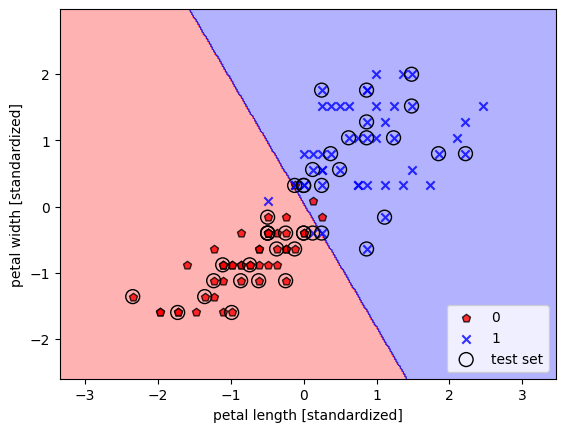

In [38]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('p', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl,
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(30, 70))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')


plt.legend(loc='lower right')

plt.show()